## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propsensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.




# 1. Propensity score matching

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Load dataset
df = pd.read_csv('lalonde.csv')
df.head(5)
df.tail(5)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
609,PSID425,0,18,11,0,0,0,1,0.0,0.0,10150.5000
610,PSID426,0,24,1,0,1,1,1,0.0,0.0,19464.6100
611,PSID427,0,21,18,0,0,0,0,0.0,0.0,0.0000
612,PSID428,0,32,5,1,0,1,1,0.0,0.0,187.6713
613,PSID429,0,16,9,0,0,0,1,0.0,0.0,1495.4590


## 1.1 A naive analysis

Compare the distribution of the outcome variable (re78) between the two groups, using plots and numbers. To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").
What might a naive "researcher" conclude from this superficial analysis?

In [3]:
treat_df = df[df.treat == 1]
treat_df.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,185.0,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,1.0,25.816216,10.345946,0.843243,0.059459,0.189189,0.708108,2095.573689,1532.055314,6349.143530
std,0.0,7.155019,2.010650,0.364558,0.237124,0.392722,0.455867,4886.620353,3219.250870,7867.402218
min,1.0,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,20.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,485.229800
50%,1.0,25.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4232.309000
75%,1.0,29.000000,12.000000,1.000000,0.000000,0.000000,1.000000,1291.468000,1817.284000,9642.999000
max,1.0,48.000000,16.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


In [4]:
control_df = df[df.treat == 0]
control_df.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,429.0,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,0.0,28.030303,10.235431,0.202797,0.142191,0.512821,0.596737,5619.236506,2466.484443,6984.169742
std,0.0,10.786653,2.855238,0.402552,0.349654,0.500419,0.491126,6788.750796,3291.996183,7294.161791
min,0.0,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,19.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,220.181300
50%,0.0,25.000000,11.000000,0.000000,0.000000,1.000000,1.000000,2547.047000,1086.726000,4975.505000
75%,0.0,35.000000,12.000000,0.000000,0.000000,1.000000,1.000000,9277.128000,3881.419000,11688.820000
max,0.0,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,25862.320000,18347.230000,25564.670000


We notice that the two groups "treat" and "control" differ a lot in term of average income in '74 before the treatment:
* mean of income in '74 for subjects that took part in the training program = **2095.57**
* mean of income in '74 for subjects that didn't take part in the training program = **5619.23**

in order to correctly study the effectiveness of the treatment and to correctly compare the two groups we'll use the folling quantity:

**Income in '78 (after the training program) - Income in '74 (before the training program)**

In other words, we'll compare the _increase of salary_ for the two groups, and not just the salary measured in '78, as suggested in the assignment. In our opinion this makes much more sense, since the two groups in this dataset are definetly unequal under this paramenter.

## First naïve visualization of the data:
here we visualize the distribution of the increase of income for the two groups:
* we visualize the distributions of the increase of income on the same graph for the two groups;
* we visualize two boxplots of the two distributions already plotted to get a better understanding of the data

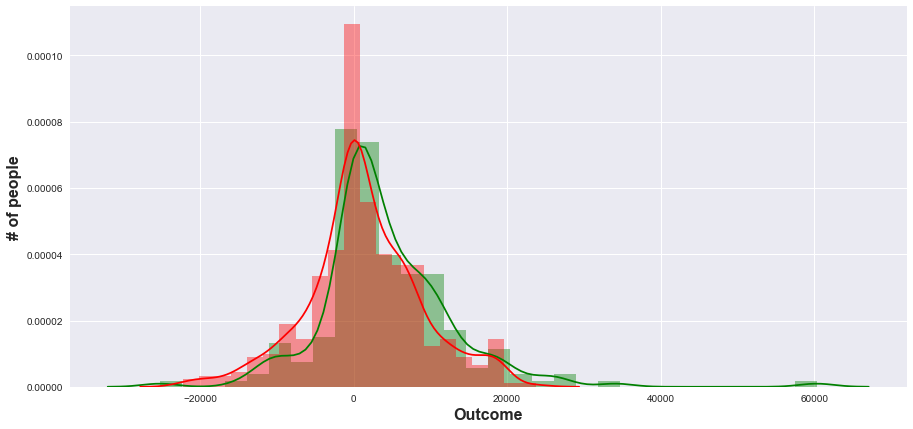

In [5]:
# Visualizing distributions
income_increase_treatment = treat_df.re78-treat_df.re74
income_increase_control = control_df.re78-control_df.re74

plt.figure(figsize=(15,7))
# plotting the distribution of the income increase for treatment group
ax1 = sns.distplot(income_increase_treatment, kde=True, color="g")
ax1.set_ylabel('# of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
# plotting the distribution of the income increase for control group
ax2 = sns.distplot(income_increase_control, kde=True, color="r")

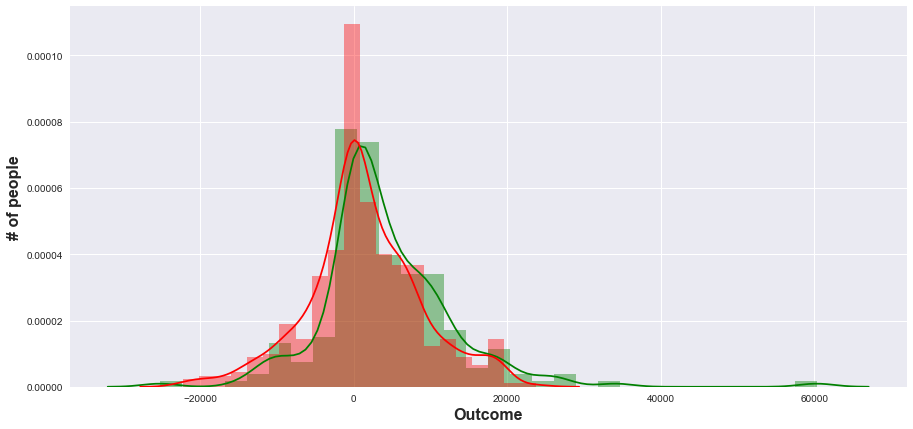

In [6]:
plt.figure(figsize=(15,7))
ax1 = sns.distplot(income_increase_treatment, kde=True, color="g")
ax1.set_ylabel('# of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')


ax2 = sns.distplot(income_increase_control, kde=True, color="r")

We can see that the distribution for the people that took part in the program (in green) is **clearly shifted to the right** siggesting (at first sight) a clear effectiveness of the training program! Let's visualize the boxplots of the two distributions to get a better understanding of them:

Skew: 1.58435185542
count      185.000000
mean      4253.569842
std       8926.985184
min     -25256.802700
25%          0.000000
50%       2456.153000
75%       8173.908000
max      60307.930000
dtype: float64


(-26519.642835000002, 63323.326500000003)

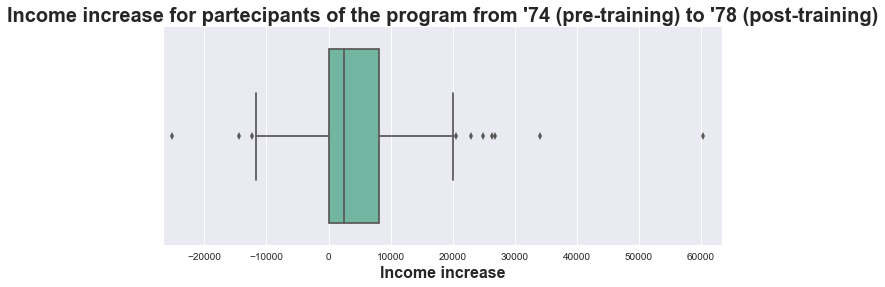

In [7]:
# Stats for people who participated on the training program
print('Skew:', income_increase_treatment.skew())
print(income_increase_treatment.describe())

# Visualisation of the distribution with a boxplot
maxvalue = np.max(income_increase_treatment) * 1.05
minvalue = np.min(income_increase_treatment) * 1.05
plt.figure(figsize=(10,4))
ax1 = sns.boxplot(x=income_increase_treatment, palette="Set2")
plt.title('Income increase for partecipants of the program from \'74 (pre-training) to \'78 (post-training)', fontsize=20).set_weight('bold')
ax1.set_xlabel('Income increase', fontsize=16).set_weight('bold')
plt.xlim(minvalue, maxvalue)

Skew: 0.0132062740685
count      429.000000
mean      1364.933236
std       7460.046942
min     -22198.490000
25%      -2447.939600
50%        243.390000
75%       5551.819000
max      23764.800000
dtype: float64


(-23308.414500000003, 24953.040000000001)

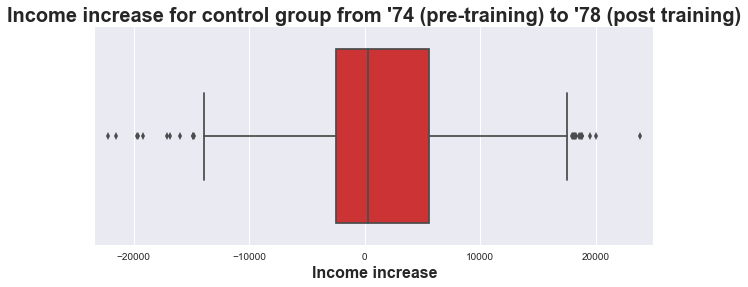

In [8]:
# Stats for people who don't participated to the training program
print('Skew:', income_increase_control.skew())
print(income_increase_control.describe())
maxvalue = np.max(income_increase_control) * 1.05
minvalue = np.min(income_increase_control) * 1.05
plt.figure(figsize=(10,4))
ax1 = sns.boxplot(x=income_increase_control, palette="Set1")
plt.title('Income increase for control group from \'74 (pre-training) to \'78 (post training)', fontsize=20).set_weight('bold')
ax1.set_xlabel('Income increase', fontsize=16).set_weight('bold')
plt.xlim(minvalue, maxvalue)

With a Naive analysis, it can be concluded:
- The mean income increase change a lot with the training programs!
    * mean income increase for partecipants in the program: **4253.14**
    * mean income increase for non-partecipants in the program: **1364.93**
- The distributions of the outcome of people that have assisted in training programs is more heavy tailed (positive skewed). If the maximum income in '78 is compared, the one for people that have assisted to the program is 60'307 chf and the one of the people that does not assited is 25'564. 
- The number of observations differ heavily: we have only 185 people in the treated group, and 429 people in the control group

## 1.2) A closer look to the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above. You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.
For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers. As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.
What do you observe? Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### Plot helper functions

In [9]:
# Plot helper functions
def value_barplot_label(plot_name):
    # Inserts the value label on the top of each bar.

    for p in plot_name.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height,'{:0.0f}'.format(height), ha="center").set_weight('bold')

def tick_format(plot,tick_type):
    if tick_type == 1:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
            label.set_rotation(90)
            
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
        
    if tick_type == 2:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)

        for label in plot.get_yticklabels():
            label.set_fontsize(14)

def value_counts_plot(feature, title, xlabel, ylabel):
    # Visualize how many universitie sper country are there in the best 200 ranking
    plt.figure(figsize=(7,5))
    ax = sns.barplot(x=df[feature].value_counts().index, y=df[feature].value_counts())
    plt.title(title, fontsize=25).set_weight('bold')
    tick_format(ax, 2)
    value_barplot_label(ax)
    ax.set_ylabel(ylabel, fontsize=16).set_weight('bold')
    ax.set_xlabel(xlabel, fontsize=16).set_weight('bold')

### 1.2.1 treat

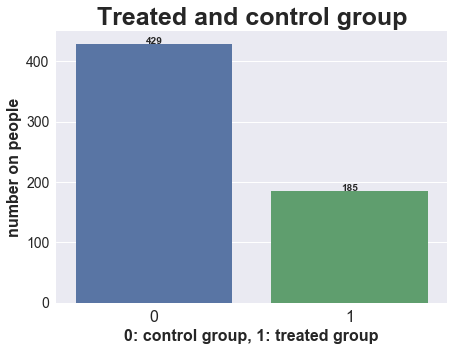

In [10]:
# Visualize 
plt.figure(figsize=(7,5))
ax = sns.barplot(x=df.treat.value_counts().index, y=df.treat.value_counts())
plt.title("Treated and control group", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('number on people', fontsize=16).set_weight('bold')
ax.set_xlabel('0: control group, 1: treated group', fontsize=16).set_weight('bold')

### 1.2.2 Age

Age describe:  count    614.000000
mean      27.363192
std        9.881187
min       16.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       55.000000
Name: age, dtype: float64


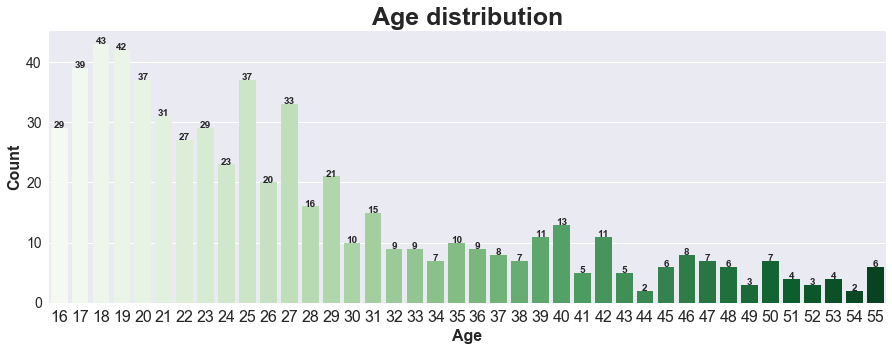

In [11]:
# Treat value counts
# Visualize 
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df.age, palette="Greens")
plt.title("Age distribution", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('Count', fontsize=16).set_weight('bold')
ax.set_xlabel('Age', fontsize=16).set_weight('bold')

print("Age describe: ", df.age.describe())

/Users/Mart/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Assisted describe:  count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64
Assisted skew:  1.1245070826
Non-Assisted describe:  count    429.000000
mean      28.030303
std       10.786653
min       16.000000
25%       19.000000
50%       25.000000
75%       35.000000
max       55.000000
Name: age, dtype: float64
Non-Assisted skew:  0.888589683831


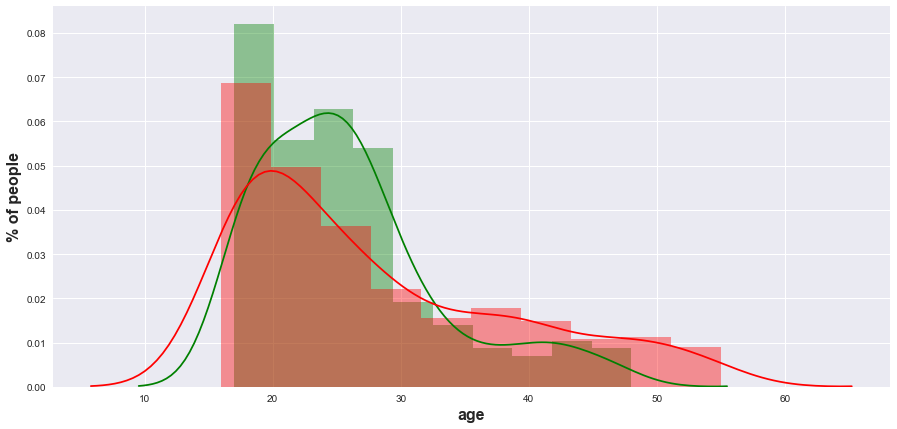

In [12]:
# Visualizing distributions
part_age = df[df.treat == 1].age[df[df.treat == 1].age != 0]
nonpart_age = df[df.treat == 0].age[df[df.treat == 0].age != 0]

plt.figure(figsize=(15,7))
ax1 = sns.distplot(part_age, kde=True, color="g")
ax1.set_ylabel('% of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='Non-assisted')
ax2 = sns.distplot(nonpart_age, kde=True, color="r")
ax2.legend(label='Non-assisted')

print("Assisted describe: ", part_age.describe())
print("Assisted skew: ", part_age.skew())
print("Non-Assisted describe: ", nonpart_age.describe())
print("Non-Assisted skew: ", nonpart_age.skew())

### 1.2.3 educ

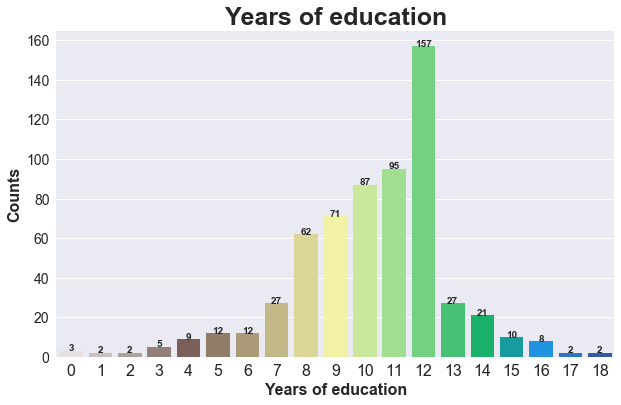

In [13]:
# Visualize 
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df.educ.value_counts().index, y=df.educ.value_counts(), palette="terrain_r")
plt.title("Years of education", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('Counts', fontsize=16).set_weight('bold')
ax.set_xlabel('Years of education', fontsize=16).set_weight('bold')

/Users/Mart/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Assisted describe:  count    185.000000
mean      10.345946
std        2.010650
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64
Assisted skew:  -0.72705994909
Non-Assisted describe:  count    429.000000
mean      10.235431
std        2.855238
min        0.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       18.000000
Name: educ, dtype: float64
Non-Assisted skew:  -0.682425954837


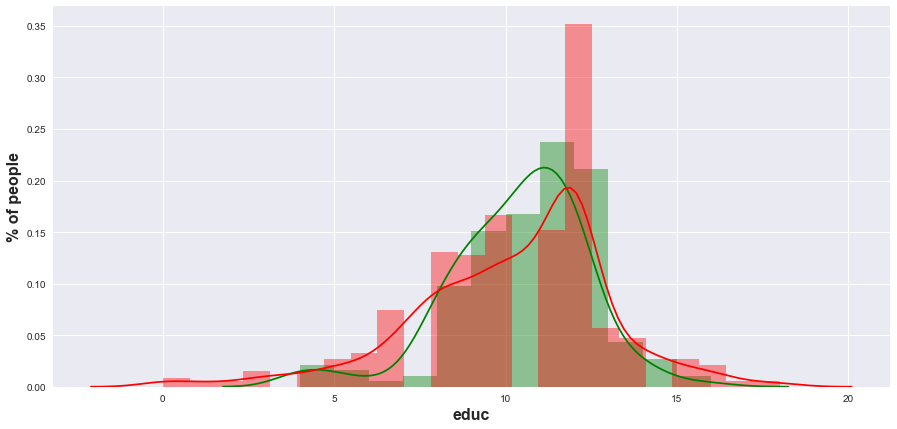

In [14]:
# Visualizing distributions
part_educ = df[df.treat == 1].educ
nonpart_educ = df[df.treat == 0].educ

plt.figure(figsize=(15,7))
ax1 = sns.distplot(part_educ, kde=True, color="g")
ax1.set_ylabel('% of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='Non-assisted')
ax2 = sns.distplot(nonpart_educ, kde=True, color="r")
ax2.legend(label='Non-assisted')

print("Assisted describe: ", part_educ.describe())
print("Assisted skew: ", part_educ.skew())
print("Non-Assisted describe: ", nonpart_educ.describe())
print("Non-Assisted skew: ", nonpart_educ.skew())

### 1.2.3 race

In [15]:
def add_race(df,x):
    
    if (df.black.loc[x]==0 & df.hispan.loc[x]==0):
        race=0
    elif (df.black.loc[x]==1 & df.hispan.loc[x]==0):
        race=1
    elif (df.black.loc[x]==0 & df.hispan.loc[x]==1):
        race=2

    return race

In [16]:
df['race'] = 0
df.race[df.black == 1] = 1
df.race[df.hispan == 1] = 2

/Users/Mart/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Mart/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


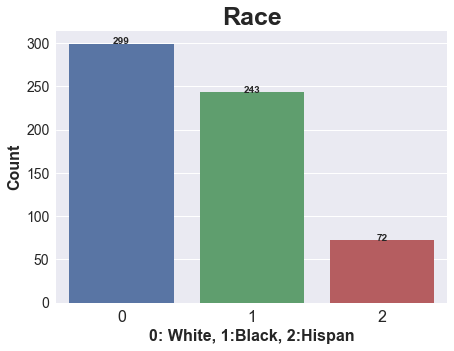

In [17]:
# Visualize 
plt.figure(figsize=(7,5))
ax = sns.barplot(x=df.race.value_counts().index, y=df.race.value_counts())
plt.title("Race", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('Count', fontsize=16).set_weight('bold')
ax.set_xlabel('0: White, 1:Black, 2:Hispan', fontsize=16).set_weight('bold')

We can see that the race of the participants is also unbalanced.

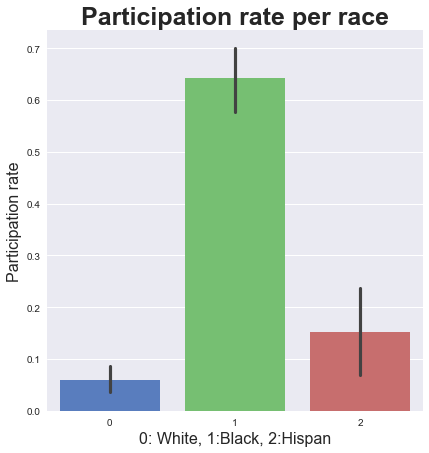

In [18]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="race", y="treat", data=df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per race", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: White, 1:Black, 2:Hispan", fontsize=16)

### 1.2.4 married

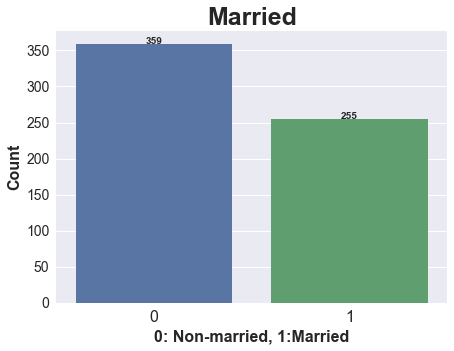

In [19]:
# Visualize 
plt.figure(figsize=(7,5))
ax = sns.barplot(x=df.married.value_counts().index, y=df.married.value_counts())
plt.title("Married", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('Count', fontsize=16).set_weight('bold')
ax.set_xlabel('0: Non-married, 1:Married', fontsize=16).set_weight('bold')

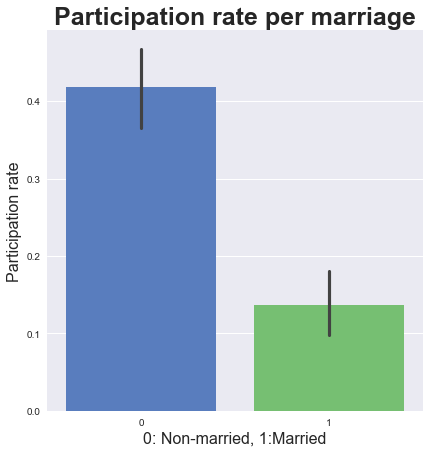

In [20]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="married", y="treat", data=df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per marriage", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: Non-married, 1:Married", fontsize=16)

### 1.2.5 Non degree

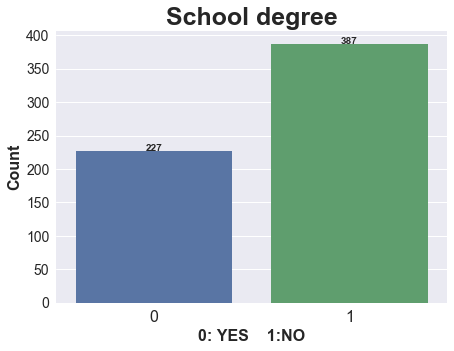

In [21]:
# Visualize 
plt.figure(figsize=(7,5))
ax = sns.barplot(x=df.nodegree.value_counts().index, y=df.nodegree.value_counts())
plt.title("School degree", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('Count', fontsize=16).set_weight('bold')
ax.set_xlabel('0: YES    1:NO', fontsize=16).set_weight('bold')

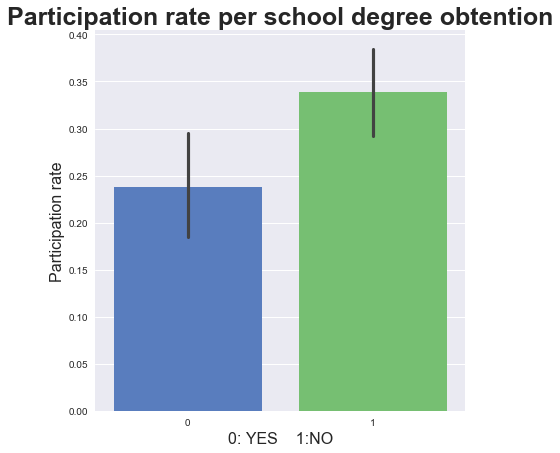

In [22]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="nodegree", y="treat", data=df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per school degree obtention", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: YES    1:NO", fontsize=16)

### 1.2.6 re74

### 1.2.7 re75

### 1.2.8 re78

## 1.3 A propensity score model
Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)


In [23]:
# Import ML library
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report

# Build a regressor
logistic = linear_model.LogisticRegression()

In [24]:
# Create feature matrix and prediction vector
feature_cols = ['age', 'educ', 'race', 'married', 'nodegree','re74','re75','re78']
X = df[feature_cols]
y = df.treat

X.describe()

,age,educ,race,married,nodegree,re74,re75,re78
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,27.363192,10.268730,0.630293,0.415309,0.630293,4557.546569,2184.938207,6792.834483
std,9.881187,2.628325,0.684335,0.493177,0.483119,6477.964479,3295.679043,7470.730792
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425
50%,25.000000,11.000000,1.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500
75%,32.000000,12.000000,1.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500
max,55.000000,18.000000,2.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


In [25]:
logistic.fit(X, y)  # train it

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
pred = logistic.predict_proba(X)
propensity_score=pred[:,1]

y_pred = logistic.predict(X)
df['prediction']= y_pred
df['propensity score']= propensity_score

In [27]:
df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,race,prediction,propensity score
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,1,0,0.334778
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,2,1,0.640633
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,1,0,0.479886
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,1,0,0.462562
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,1,0,0.455838


In [28]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.71      0.90      0.79       429
          1       0.38      0.15      0.21       185

avg / total       0.61      0.67      0.62       614



## 1.4 Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?

## ANSWER 
As LaLonde suggests in his work, "the mean earnings of the AFDC treatments and the AFDC controls in the year before train- ing differ by $2, the mean age of the two groups differ by 3 months, and the mean years of schooling are identical. None of the differences between the treatment's and control's characteristics, hours, and earnings are statistically significant."

In [29]:
from scipy.optimize import linear_sum_assignment

control_df = df[df['treat']==0].reset_index(drop=True)
treat_df = df[df['treat']==1].reset_index(drop=True)

def match(treat_df, control_df):
    
    # we store in prop1, prop2 the vectors of the propensity scorse of the two groups
    prop1 = treat_df['propensity score']
    prop0 = control_df['propensity score']
    
    # building the matrix of costs of the arches of the bipartite graph
    cost = np.array([np.abs(p-prop0) for p in prop1])
    
    # With this simple command we find the desired matches!
    row_ind, col_ind = linear_sum_assignment(cost)
    
    # we extract the matched people from treatment and control group
    matched_treat_df = treat_df.loc[row_ind]
    matched_control_df = control_df.loc[col_ind]
    # we add a new feature to the treatment: the ID of the matched person in the control group
    matched_treat_df['matched control ID']=col_ind
    # we merge the dataframe, to have the data of the matched people on the same row!
    merged_df = pd.merge(matched_treat_df, matched_control_df,left_on='matched control ID', right_index=True)
    
    # we creae the new feature 'RESULTS OF TREATMENT'
    merged_df['RESULT OF TREATMENT']=(merged_df.re78_x-merged_df.re74_x)-\
                                     (merged_df.re78_y-merged_df.re74_y)
    # we create the concatenated dataframe with the matched control and treatment group
    concat_df = pd.concat([matched_treat_df, matched_control_df])
    
    return matched_treat_df,matched_control_df, merged_df, concat_df


treat_df, new_control_df, matched_df, new_df = match(treat_df, control_df)


Oh yeah! Let's go for the viz:

/Users/Mart/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


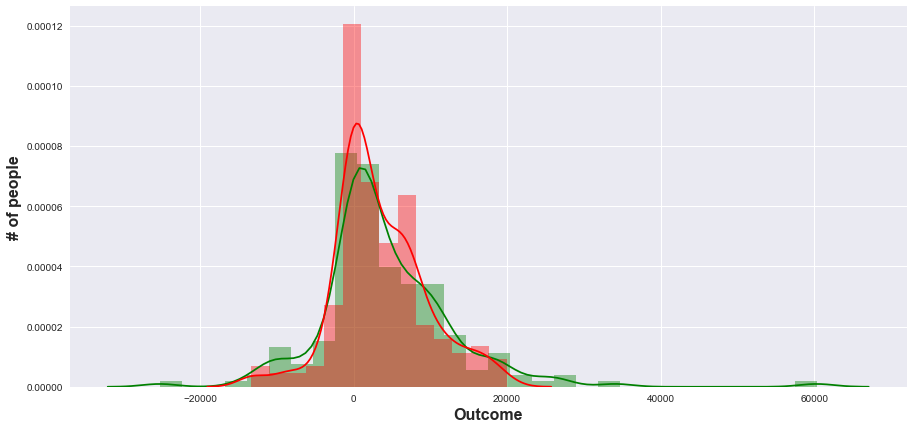

In [30]:
# Visualizing distributions
part = treat_df.re78-treat_df.re74
nonpart = new_control_df.re78 - new_control_df.re74

plt.figure(figsize=(15,7))
ax1 = sns.distplot(part, kde=True, color="g")
ax1.set_ylabel('# of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='Non-assisted')

ax2 = sns.distplot(nonpart, kde=True, color="r")
ax2.legend(label='Non-assisted')

Just a check on the merged dataframe: this should return cost[row_ind, col_ind].sum()

We see that now **the clear shift to the right of the green distribution is disappeared!**

In [31]:
(abs(matched_df['propensity score_x']-matched_df['propensity score_y'])).sum()

4.664324674831683

/Users/Mart/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


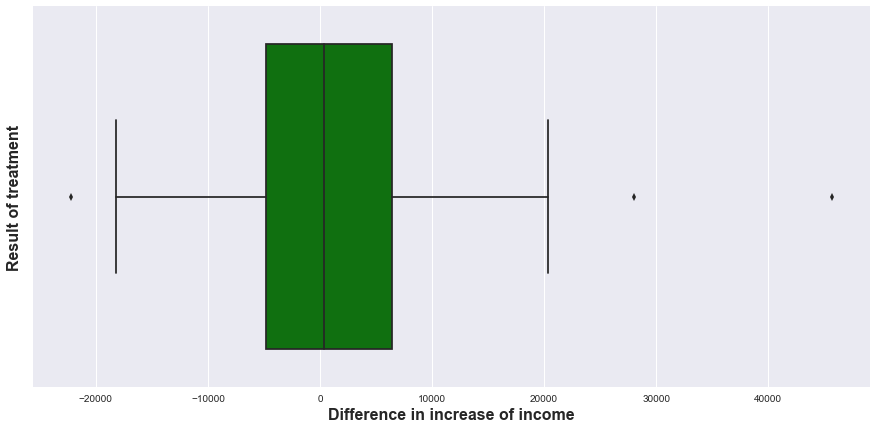

In [32]:
# Visualizing distributions
plt.figure(figsize=(15,7))
ax1 = sns.boxplot(matched_df['RESULT OF TREATMENT'], color="g")
ax1.set_ylabel('Result of treatment', fontsize=16).set_weight('bold')
ax1.set_xlabel('Difference in increase of income', fontsize=16).set_weight('bold')
ax1.legend(label='difference')

Let's repeat the analysis of point 1.2 with the new control group:

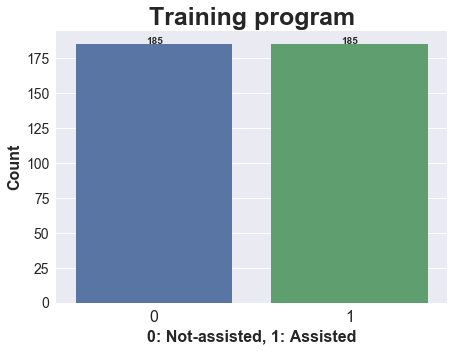

In [33]:
# Visualize 
plt.figure(figsize=(7,5))
ax = sns.barplot(x=new_df.treat.value_counts().index, y=new_df.treat.value_counts())
plt.title("Training program", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('Count', fontsize=16).set_weight('bold')
ax.set_xlabel('0: Not-assisted, 1: Assisted', fontsize=16).set_weight('bold')

### 1.2.2 Age

/Users/Mart/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Assisted describe:  count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64
Assisted skew:  1.1245070826
Non-Assisted describe:  count    185.000000
mean      23.870270
std        9.604371
min       16.000000
25%       17.000000
50%       20.000000
75%       27.000000
max       55.000000
Name: age, dtype: float64
Non-Assisted skew:  1.6946069504


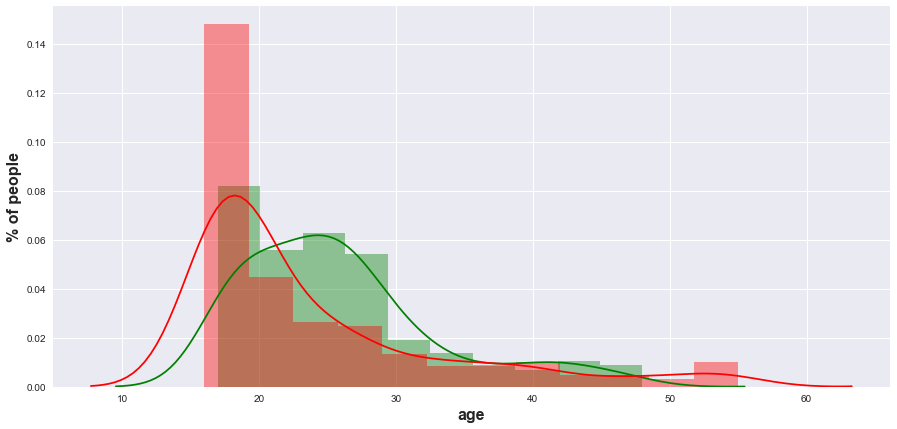

In [34]:
# Visualizing distributions
part_age = new_df[new_df.treat == 1].age[new_df[new_df.treat == 1].age != 0]
nonpart_age = new_df[new_df.treat == 0].age[new_df[new_df.treat == 0].age != 0]

plt.figure(figsize=(15,7))
ax1 = sns.distplot(part_age, kde=True, color="g")
ax1.set_ylabel('% of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='Non-assisted')
ax2 = sns.distplot(nonpart_age, kde=True, color="r")
ax2.legend(label='Non-assisted')

print("Assisted describe: ", part_age.describe())
print("Assisted skew: ", part_age.skew())
print("Non-Assisted describe: ", nonpart_age.describe())
print("Non-Assisted skew: ", nonpart_age.skew())

### 1.2.3 educ

/Users/Mart/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Assisted describe:  count    185.000000
mean      10.345946
std        2.010650
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64
Assisted skew:  -0.72705994909
Non-Assisted describe:  count    185.000000
mean       9.735135
std        2.811101
min        0.000000
25%        9.000000
50%       10.000000
75%       12.000000
max       17.000000
Name: educ, dtype: float64
Non-Assisted skew:  -0.973533578943


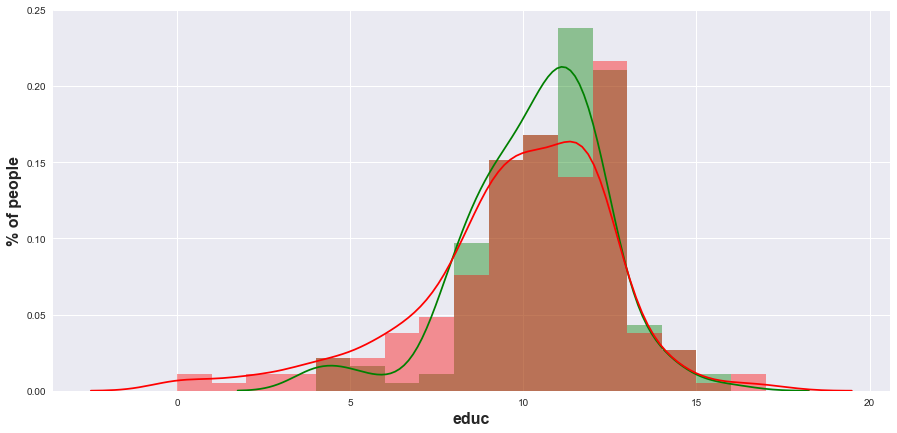

In [35]:
# Visualizing distributions
part_educ = new_df[new_df.treat == 1].educ
nonpart_educ = new_df[new_df.treat == 0].educ

plt.figure(figsize=(15,7))
ax1 = sns.distplot(part_educ, kde=True, color="g")
ax1.set_ylabel('% of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='Non-assisted')
ax2 = sns.distplot(nonpart_educ, kde=True, color="r")
ax2.legend(label='Non-assisted')

print("Assisted describe: ", part_educ.describe())
print("Assisted skew: ", part_educ.skew())
print("Non-Assisted describe: ", nonpart_educ.describe())
print("Non-Assisted skew: ", nonpart_educ.skew())

### 1.2.3 race

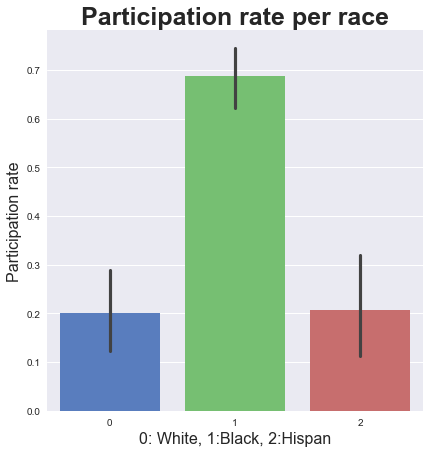

In [36]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="race", y="treat", data=new_df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per race", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: White, 1:Black, 2:Hispan", fontsize=16)

### 1.2.4 married

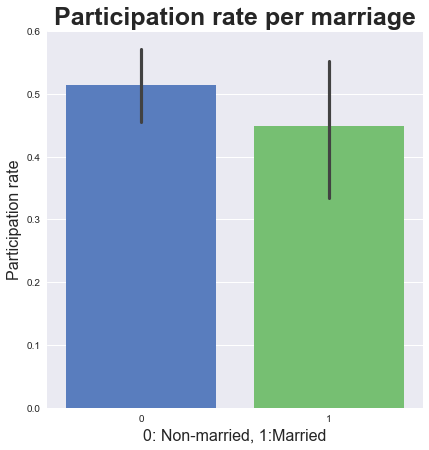

In [37]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="married", y="treat", data=new_df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per marriage", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: Non-married, 1:Married", fontsize=16)

### 1.2.5 Non degree

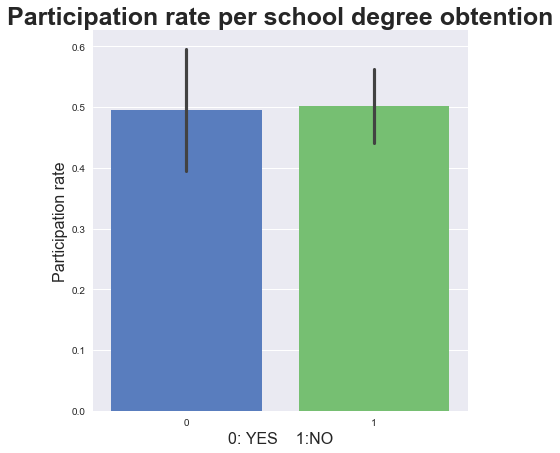

In [38]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="nodegree", y="treat", data=new_df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per school degree obtention", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: YES    1:NO", fontsize=16)

## 1.5 Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.

In [39]:
treat_white_df = treat_df[treat_df.race==0].reset_index(drop=True)
treat_black_df = treat_df[treat_df.race==1].reset_index(drop=True)
treat_hispanic_df = treat_df[treat_df.race==2].reset_index(drop=True)

control_white_df = control_df[control_df.race==0].reset_index(drop=True)
control_black_df = control_df[control_df.race==1].reset_index(drop=True)
control_hispanic_df = control_df[control_df.race==2].reset_index(drop=True)

In [40]:
print(treat_white_df.shape, control_white_df.shape)
print(treat_black_df.shape, control_black_df.shape)
print(treat_hispanic_df.shape, control_hispanic_df.shape)

(18, 15) (281, 14)
(156, 15) (87, 14)
(11, 15) (61, 14)


THERE ARE LESS BLACK PEOPLE IN THE CONTROL THAN IN THE TREATMENT! THIS IS NOT GOOD 'CAUSE I CAN'T FIND A MATCH FOR EVERY TREATED ONE -> I HAVE TO REDUCE THE TREATED BLACK PEOPLE TO 87

In [41]:
treat_white_df, control_white_df, merged_white_df, concat_white_df = match(treat_white_df, control_white_df)
treat_black_df, control_black_df, merged_black_df, concat_black_df = match(treat_black_df, control_black_df)
treat_hispanic_df, control_hispanic_df, merged_hispanic_df, concat_hispanic_df = match(treat_hispanic_df, control_hispanic_df)


In [42]:
print(treat_white_df.shape, control_white_df.shape)
print(treat_black_df.shape, control_black_df.shape)
print(treat_hispanic_df.shape, control_hispanic_df.shape)

(18, 15) (18, 14)
(87, 15) (87, 14)
(11, 15) (11, 14)


In [43]:
newnew_treat_df = pd.concat([treat_white_df,treat_black_df,treat_hispanic_df])
newnew_control_df = pd.concat([control_white_df,control_black_df,control_hispanic_df])

newnew_df = pd.concat([newnew_treat_df,newnew_control_df])

newnew_df.head()

,age,black,educ,hispan,id,married,matched control ID,nodegree,prediction,propensity score,race,re74,re75,re78,treat
0,33,0,12,0,NSW10,1,15.0,0,0,0.218848,0,0.0,0.0,12418.070,1
1,41,0,14,0,NSW22,0,226.0,0,0,0.255809,0,0.0,0.0,5149.501,1
2,38,0,9,0,NSW23,0,134.0,1,0,0.298727,0,0.0,0.0,6408.950,1
3,19,0,9,0,NSW42,0,269.0,1,0,0.362829,0,0.0,0.0,13188.830,1
4,22,0,11,0,NSW60,0,257.0,1,0,0.317674,0,0.0,0.0,1048.432,1


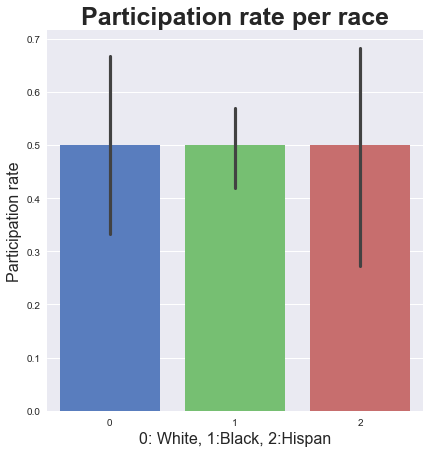

In [44]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="race", y="treat", data=newnew_df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per race", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: White, 1:Black, 2:Hispan", fontsize=16)

In [45]:
merged_df = pd.concat([merged_white_df,merged_black_df,merged_hispanic_df])

## 1.6 A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?

/Users/Mart/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


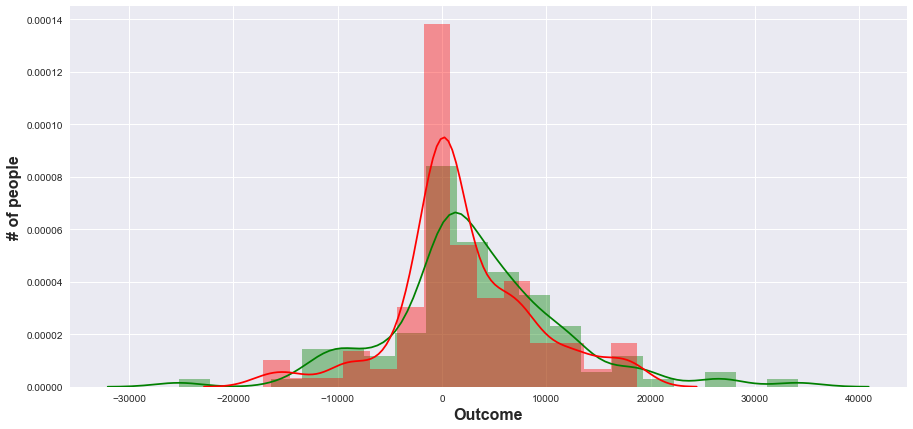

In [48]:
# Visualizing distributions
income_increase_treated = newnew_treat_df.re78-newnew_treat_df.re74
income_increase_control = newnew_control_df.re78-newnew_control_df.re74

plt.figure(figsize=(15,7))
ax1 = sns.distplot(income_increase_treated, kde=True, color="g")
ax1.set_ylabel('# of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='Non-assisted')

ax2 = sns.distplot(income_increase_control, kde=True, color="r")
ax2.legend(label='Non-assisted')

/Users/Mart/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


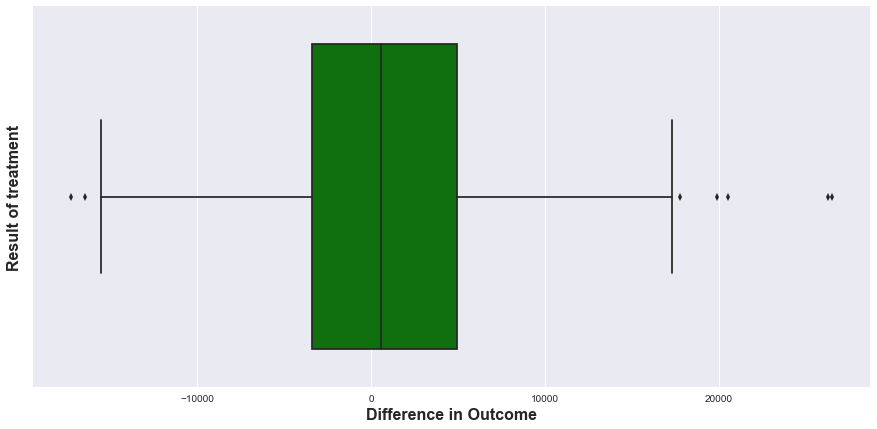

In [49]:
plt.figure(figsize=(15,7))
ax1 = sns.boxplot(merged_df['RESULT OF TREATMENT'], color="g")
ax1.set_ylabel('Result of treatment', fontsize=16).set_weight('bold')
ax1.set_xlabel('Difference in Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='difference')

# 2. Applied ML